# AB2018 Derin Öğrenme Atölyesi - Sinir Ağı Örneği

Bu örnekte Tensorflow kullanarak bir sinir ağı oluşturacağız ve MNIST verisetinde sınıflandırma yapacağız. Başlangıç kısmı, bir önceki örnekle neredeyse aynı, bu nedenle hızlıca geçeceğim. İlk iş gerekli paketleri içe aktarıyoruz.

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

MNIST verisetini indiriyor ve kullanıma hazır hale getiriyoruz.

In [2]:
mnist = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


Resimleri göstermek için basit bir yardımcı fonksiyon oluşturuyoruz.

In [3]:
def show_digit(pixels):
    img = pixels.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='gray_r')

Önceki örnekte, verisetine kısaca bir gözatmıştık. Burada doğrudan modeli oluşturmaya başlayalım. İlk iş, veri girişini sağlayacak yer tutucuları oluşturuyoruz.

In [4]:
X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

Önceki örnekten farklı olarak bu sefer modelde gizli katmanlar (hidden layer) kullanacağız. Tüm katmanlar için gerekli değişkenleri oluşturmamız lazım.

In [5]:
W_hidden1 = tf.Variable(tf.truncated_normal(shape=[784, 256], stddev=0.1))
b_hidden1 = tf.Variable(tf.constant(shape=[256], value=0.1))

W_hidden2 = tf.Variable(tf.truncated_normal(shape=[256, 128], stddev=0.1))
b_hidden2 = tf.Variable(tf.constant(shape=[128], value=0.1))

W_output = tf.Variable(tf.truncated_normal(shape=[128, 10], stddev=0.1))
b_output = tf.Variable(tf.constant(shape=[10], value=0.1))

Değişkenlerin boyutlarından anlaşılacağı üzere, modelde 2 tane gizli katman mevcut (256 ve 128 nöronluk). Şimdi bunları kullanarak tahmin fonksiyonunu (grafını) oluşturmamız lazım.

In [6]:
logit1 = tf.matmul(X, W_hidden1) + b_hidden1
activ1 = tf.nn.sigmoid(logit1)

logit2 = tf.matmul(activ1, W_hidden2) + b_hidden2
activ2 = tf.nn.sigmoid(logit2)

logit3 = tf.matmul(activ2, W_output) + b_output
y_pred = tf.nn.softmax(logit3)

Her bir katman, kendisine gelen girdilerle **logit** hesabını yapıyor ve çıkan değerleri bir aktivasyon fonksiyonuna veriyor. Bu aktivasyon fonksiyonları sayesinde çıkan değerleri modifiye etmek mümkün olacak. Gizli katmanlarda kullandığımız **sigmoid** fonksiyonu, kendisine gelen değerleri 0 ile 1 arasına çekecek. Son çıktı katmanında ise, olasılık değerlerini üretmek için **softmax** fonksiyonunu kullandık.

Buradan sonrası, önceki örnekle neredeyse aynı, bu nedenle fazla detaya girmeyeceğim. Hemen kayıp (loss) fonksiyonunu tanımlayalım.

In [7]:
loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_pred), reduction_indices=[1]))

Sonrasında optimizasyon aracı gerekecek.

In [8]:
optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

Sistemin hassiyetini hesaplamak için bir graf daha oluşturuyoruz.

In [10]:
correct_predictions = tf.equal(tf.argmax(y, 1), tf.argmax(y_pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

Tensorflow oturumunu oluşturalım ve değişkenlerin ilk değerlerini verelim:

In [19]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

Bir önceki örnekten farklı olarak, bu sefer modeli daha fazla eğitmemiz gerekecek. Zira optimize edilmesi gerekilen çok daha fazla değişken var.

In [20]:
for i in xrange(30001):
    xs, ys = mnist.train.next_batch(128)
    
    _, batch_loss, batch_acc = sess.run([optimizer, loss, accuracy], feed_dict={X: xs, y: ys})
    
    if i % 3000 == 0:
        print("[*] Adım: %d, batch kaybı: %.6f, batch hassasiyeti: %.2f%%" % (i, batch_loss, batch_acc * 100))

[*] Adım: 0, batch kaybı: 2.643961, batch hassasiyeti: 6.25%
[*] Adım: 3000, batch kaybı: 0.314838, batch hassasiyeti: 91.41%
[*] Adım: 6000, batch kaybı: 0.266546, batch hassasiyeti: 92.19%
[*] Adım: 9000, batch kaybı: 0.186936, batch hassasiyeti: 95.31%
[*] Adım: 12000, batch kaybı: 0.300896, batch hassasiyeti: 92.97%
[*] Adım: 15000, batch kaybı: 0.261727, batch hassasiyeti: 92.19%
[*] Adım: 18000, batch kaybı: 0.084483, batch hassasiyeti: 98.44%
[*] Adım: 21000, batch kaybı: 0.150009, batch hassasiyeti: 96.88%
[*] Adım: 24000, batch kaybı: 0.113441, batch hassasiyeti: 96.88%
[*] Adım: 27000, batch kaybı: 0.136246, batch hassasiyeti: 94.53%
[*] Adım: 30000, batch kaybı: 0.208626, batch hassasiyeti: 92.97%


Modelin hassasiyetine gözatalım.

In [21]:
train_acc = sess.run(accuracy, feed_dict={X: mnist.train.images, y: mnist.train.labels})
test_acc = sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels})
print(u"Eğitim hassasiyeti: %.2f%%, Test hassasiyeti: %.2f%%" % (train_acc * 100, test_acc * 100))

Eğitim hassasiyeti: 96.29%, Test hassasiyeti: 95.88%


Önceki modele göre hassasiyet bir miktar artmış ama azıcık da overfitting'e yakalanmışız. Şimdi resimler üzerinden tahminlere gözatalım.

Resmin 0 olma ihtimali: 0.00%
Resmin 1 olma ihtimali: 0.07%
Resmin 2 olma ihtimali: 0.10%
Resmin 3 olma ihtimali: 99.22%
Resmin 4 olma ihtimali: 0.00%
Resmin 5 olma ihtimali: 0.21%
Resmin 6 olma ihtimali: 0.00%
Resmin 7 olma ihtimali: 0.00%
Resmin 8 olma ihtimali: 0.39%
Resmin 9 olma ihtimali: 0.00%


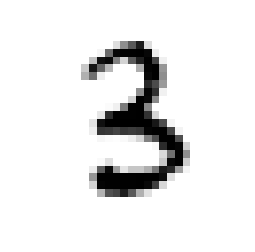

In [26]:
sample = random.choice(mnist.test.images)

predictions = sess.run(y_pred, feed_dict={X: [sample] })[0]

for i, v in enumerate(predictions):
    print(u"Resmin %d olma ihtimali: %.2f%%" % (i, v * 100))
    
show_digit(sample)

Modelin eğitimi diğer modele göre oldukça uzun sürdü. Bu süreyi kısaltmanın bir yolu, farklı optimizasyon sistemleri denenemek. Şimdi gelin **AdadeltaOptimizer** adlı aracı deneyelim.

In [28]:
optimizer = tf.train.AdadeltaOptimizer(1.0).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in xrange(10001):
    xs, ys = mnist.train.next_batch(128)
    
    _, batch_loss, batch_acc = sess.run([optimizer, loss, accuracy], feed_dict={X: xs, y: ys})
    
    if i % 1000 == 0:
        print("[*] Adım: %d, batch kaybı: %.6f, batch hassasiyeti: %.2f%%" % (i, batch_loss, batch_acc * 100))
        
train_acc = sess.run(accuracy, feed_dict={X: mnist.train.images, y: mnist.train.labels})
test_acc = sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels})
print(u"\nEğitim hassasiyeti: %.2f%%, Test hassasiyeti: %.2f%%" % (train_acc * 100, test_acc * 100))

[*] Adım: 0, batch kaybı: 2.443028, batch hassasiyeti: 9.38%
[*] Adım: 1000, batch kaybı: 0.306575, batch hassasiyeti: 94.53%
[*] Adım: 2000, batch kaybı: 0.201096, batch hassasiyeti: 92.97%
[*] Adım: 3000, batch kaybı: 0.212247, batch hassasiyeti: 91.41%
[*] Adım: 4000, batch kaybı: 0.112714, batch hassasiyeti: 98.44%
[*] Adım: 5000, batch kaybı: 0.138674, batch hassasiyeti: 96.09%
[*] Adım: 6000, batch kaybı: 0.136950, batch hassasiyeti: 93.75%
[*] Adım: 7000, batch kaybı: 0.103945, batch hassasiyeti: 96.88%
[*] Adım: 8000, batch kaybı: 0.062237, batch hassasiyeti: 97.66%
[*] Adım: 9000, batch kaybı: 0.098965, batch hassasiyeti: 98.44%
[*] Adım: 10000, batch kaybı: 0.156161, batch hassasiyeti: 98.44%

Eğitim hassasiyeti: 97.97%, Test hassasiyeti: 96.92%


Görüldüğü üzere, daha farklı bir optimizasyon aracı kullanarak daha yüksek bir hassasiyete ulaştık. Hem de daha az eğitim döngüsüyle. Çözülmesi istenen probleme göre, uygun bir optimizasyon sistemi kullanmak hem eğitim zamanını azaltabilir hem de hassasiyeti yükseltebilir. Tensorflow'da kullanabileceğiniz optimizasyon araçlarına gözatmak için [bu sayfaya](https://www.tensorflow.org/api_docs/python/tf/train) gözatabilirsiniz.